
# Liputan6 — Dataset Analysis for Text Summarization (Colab)

This notebook performs **EDA** (Exploratory Data Analysis) tailored for summarization:
- Load & preview dataset
- Missing values and column profiling
- Duplicates check (article/title)
- Length distributions (article vs summary)
- Compression ratio (summary/article)
- Simple sentence counts
- Save quick EDA outputs to Drive

> **Notes**  
> - Focus on columns: `clean_article_text` and `clean_summary_text` for modeling.  
> - Update the path below to match your Google Drive location.


# Daftar Isi

- [Langkah 1 — Persiapan & Mount Google Drive](#step1)
- [Langkah 2 — Memuat Dataset (CSV)](#step2)
- [Langkah 3 — Gambaran Umum Kolom (Profil Data)](#step3)
- [Langkah 4 — Nilai Hilang (Missing Values) & Visualisasi](#step4)
- [Langkah 5 — Distribusi Panjang Teks (Artikel & Ringkasan)](#step5)
- [Langkah 6 — Jumlah Kalimat per Artikel (Perkiraan)](#step6)
- [Langkah 7 — Contoh Artikel Terpendek & Terpanjang](#step7)
- [Langkah 8 — Frekuensi Kata Umum (Most Common Words)](#step8)
- [Langkah 9 — Analisis Stopwords dalam Artikel](#step9)
- [Langkah 10 — Simpan Ringkasan EDA & Sampel ke Drive](#step8)

## Langkah 1 — Persiapan & Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# === PATH CONFIG ===
from pathlib import Path
DATA_PATH = "/content/drive/MyDrive/Tugas/Liputan6/liputan6_train.csv"
OUTPUT_DIR = "/content/drive/MyDrive/Tugas/Liputan6/Outputs"
Path(OUTPUT_DIR).mkdir(parents=True, exist_ok=True)
print("DATA_PATH :", DATA_PATH)
print("OUTPUT_DIR:", OUTPUT_DIR)

Mounted at /content/drive
DATA_PATH : /content/drive/MyDrive/Tugas/Liputan6/liputan6_train.csv
OUTPUT_DIR: /content/drive/MyDrive/Tugas/Liputan6/Outputs


In [2]:
import os

if os.path.exists(DATA_PATH):
  print(f"File found at {DATA_PATH}")
else:
  print(f"File NOT found at {DATA_PATH}")

File found at /content/drive/MyDrive/Tugas/Liputan6/liputan6_train.csv


In [3]:
!pip install -q pandas numpy matplotlib
!pip install -q wordcloud Sastrawi

import pandas as pd, numpy as np
import os, math
from pathlib import Path
import matplotlib.pyplot as plt



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.5 MB/s eta 0:00:00


<a id="step2"></a>

## Langkah 2 — Memuat Dataset (CSV)

In [4]:
# Load CSV (use low_memory=False to avoid dtype guessing warnings)
# Try different delimiters if ParserError occurs. Common ones are ',' (default) or ';'
import os

if not os.path.exists(DATA_PATH):
    print(f"Error: Dataset file not found at {DATA_PATH}. Please verify the path in Google Drive.")
    df = None # Ensure df is None if file is not found
else:
    try:
        df = pd.read_csv(DATA_PATH, low_memory=False)
    except pd.errors.ParserError as e:
        print(f"ParserError with default delimiter: {e}")
        print("Trying with semicolon delimiter ';'")
        try:
            df = pd.read_csv(DATA_PATH, low_memory=False, sep=';')
        except Exception as e_semi:
            print(f"Error with semicolon delimiter: {e_semi}")
            print("Could not load the dataset with common delimiters. Please check the file format.")
            df = None # Ensure df is None if loading fails

if df is not None:
    print('Rows:', len(df), '| Cols:', len(df.columns))
    display(df.head(3))

Rows: 193883 | Cols: 5


,id,url,clean_article_text,clean_summary_text,extractive_summary_indices
0,100000,https://www.liputan6.com/news/read/100000/yudh...,"Liputan6 . com , Jakarta : Presiden Susilo Bam...","Menurut Presiden Susilo Bambang Yudhoyono , ke...",0|1
1,100002,https://www.liputan6.com/news/read/100002/jepa...,"Liputan6 . com , Jakarta : Perdana Menteri Jep...",Pada masa silam Jepang terlalu ambisius untuk ...,2|3
2,100003,https://www.liputan6.com/news/read/100003/pulu...,"Liputan6 . com , Kutai : Banjir dengan ketingg...",Puluhan hektare areal persawahan yang sebagian...,1|5


<a id="step3"></a>

## Langkah 3 — Gambaran Umum Kolom (Profil Data)

In [5]:

print('Columns:', list(df.columns))
display(df.describe(include='all').transpose().fillna(''))


Columns: ['id', 'url', 'clean_article_text', 'clean_summary_text', 'extractive_summary_indices']


/tmp/ipython-input-4048701477.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  display(df.describe(include='all').transpose().fillna(''))


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,193883.0,,,,168003.947381,78141.732151,26408.0,103116.5,171715.0,233933.5,299999.0
url,193883.0,193883,https://www.liputan6.com/news/read/99999/rp-90...,1,,,,,,,
clean_article_text,193883.0,193012,"Liputan6 . com , Jakarta : Di hari perdagangan...",3,,,,,,,
clean_summary_text,193883.0,192775,"Jumat ( 7/9 ) , genap tiga tahun kematian akti...",4,,,,,,,
extractive_summary_indices,193883.0,8471,0|1,29927,,,,,,,


<a id="step4"></a>

## Langkah 4 — Nilai Hilang (Missing Values) & Visualisasi

,null_fraction
id,0.0
url,0.0
clean_article_text,0.0
clean_summary_text,0.0
extractive_summary_indices,0.0


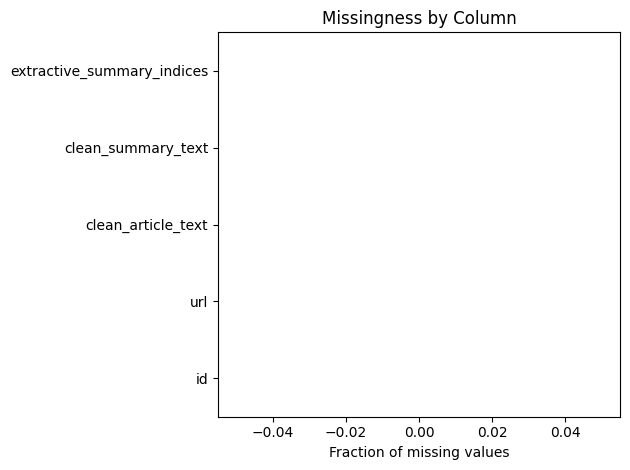

In [6]:

null_frac = df.isna().mean().sort_values(ascending=False)
display(null_frac.to_frame('null_fraction'))

# Plot null fraction
plt.figure()
null_frac.plot(kind='barh')
plt.xlabel('Fraction of missing values')
plt.title('Missingness by Column')
plt.tight_layout()
plt.show()


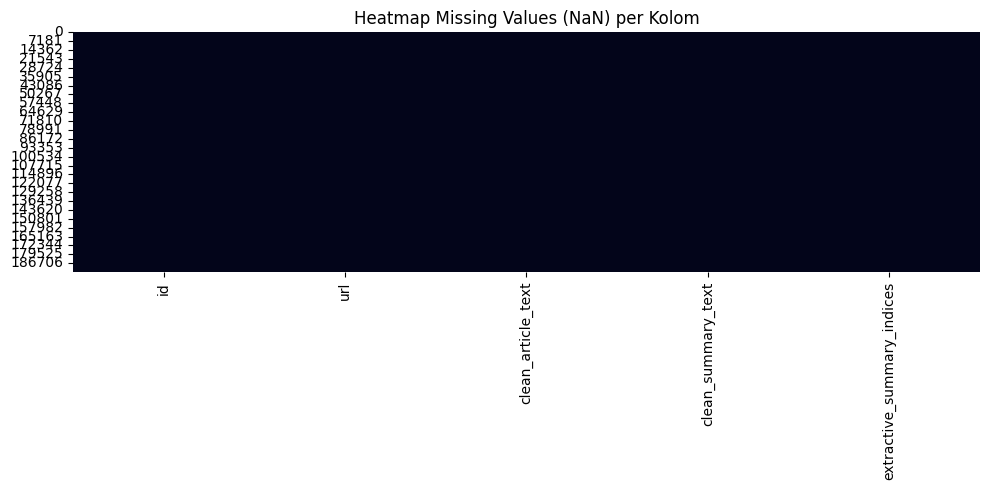

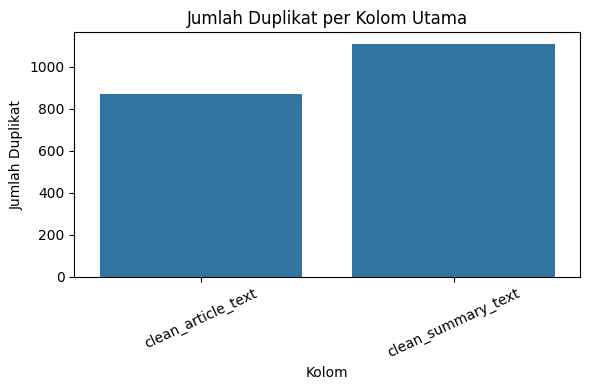

Jumlah duplikat artikel  : 871
Jumlah duplikat ringkasan: 1108


In [7]:

# ============================================================
# 🔍 Visualisasi Lanjutan: Missing Values & Duplikasi
# ============================================================
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap missing values
plt.figure(figsize=(10, 5))
sns.heatmap(df.isna(), cbar=False)
plt.title("Heatmap Missing Values (NaN) per Kolom")
plt.tight_layout()
plt.show()

# Jumlah duplikat berdasarkan kolom utama (jika ada)
dup_article = df.duplicated(subset=['clean_article_text']).sum() if 'clean_article_text' in df.columns else 0
dup_summary = df.duplicated(subset=['clean_summary_text']).sum() if 'clean_summary_text' in df.columns else 0

dup_df = pd.DataFrame({
    'Kolom': ['clean_article_text', 'clean_summary_text'],
    'Jumlah Duplikat': [dup_article, dup_summary]
})

plt.figure(figsize=(6, 4))
sns.barplot(data=dup_df, x='Kolom', y='Jumlah Duplikat')
plt.title("Jumlah Duplikat per Kolom Utama")
plt.xticks(rotation=25)
plt.tight_layout()
plt.show()

print("Jumlah duplikat artikel  :", dup_article)
print("Jumlah duplikat ringkasan:", dup_summary)


<a id="step5"></a>

<a id="step6"></a>

## Langkah 5 — Distribusi Panjang Teks (Artikel & Ringkasan)

Article length (words): mean/median/p90/max = 234.07 197.0 391.0 7379
Summary length (words): mean/median/p90/max = 30.99 30.0 39.0 102


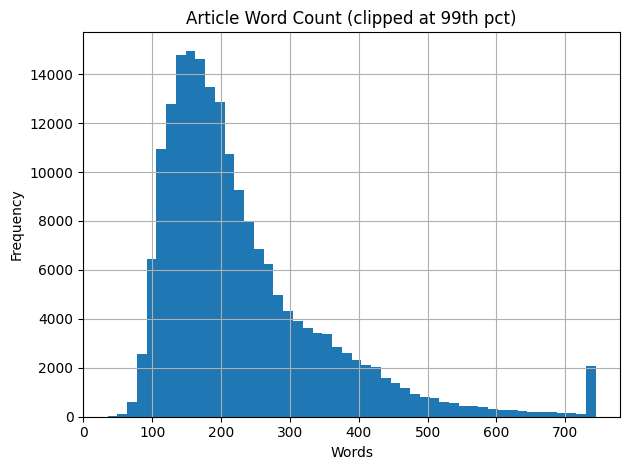

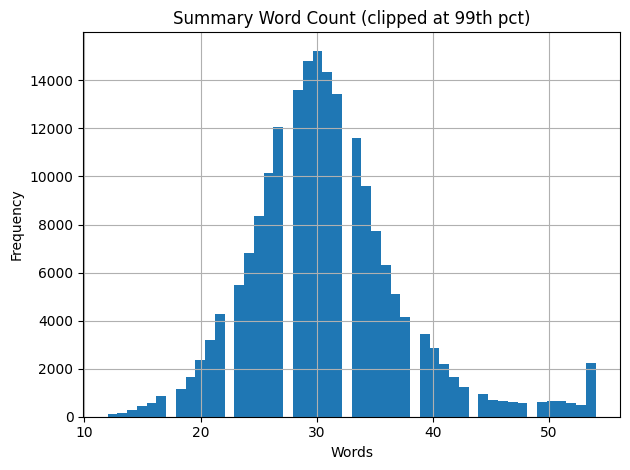

In [8]:
def count_words(s):
    if pd.isna(s): return 0
    return len(str(s).split())

# Use the actual column names 'article' and 'summary'
article_col_name = 'clean_article_text'
summary_col_name = 'clean_summary_text'

if article_col_name in df.columns and summary_col_name in df.columns:
    art_len = df[article_col_name].apply(count_words)
    sum_len = df[summary_col_name].apply(count_words)

    print('Article length (words): mean/median/p90/max =',
          round(art_len.mean(),2), np.median(art_len), np.percentile(art_len,90), art_len.max())

    print('Summary length (words): mean/median/p90/max =',
          round(sum_len.mean(),2), np.median(sum_len), np.percentile(sum_len,90), sum_len.max())

    # Histograms
    plt.figure()
    art_len.clip(upper=np.percentile(art_len, 99)).hist(bins=50)
    plt.title('Article Word Count (clipped at 99th pct)')
    plt.xlabel('Words'); plt.ylabel('Frequency')
    plt.tight_layout(); plt.show()

    plt.figure()
    sum_len.clip(upper=np.percentile(sum_len, 99)).hist(bins=50)
    plt.title('Summary Word Count (clipped at 99th pct)')
    plt.xlabel('Words'); plt.ylabel('Frequency')
    plt.tight_layout(); plt.show()
else:
    print(f"Skip length distribution: required columns '{article_col_name}' or '{summary_col_name}' not found.")

<a id="step8"></a>

## Langkah 6 — Jumlah Kalimat per Artikel (Perkiraan)

Sentence count — mean/median/p90/max: 15.22 13.0 24.0 505


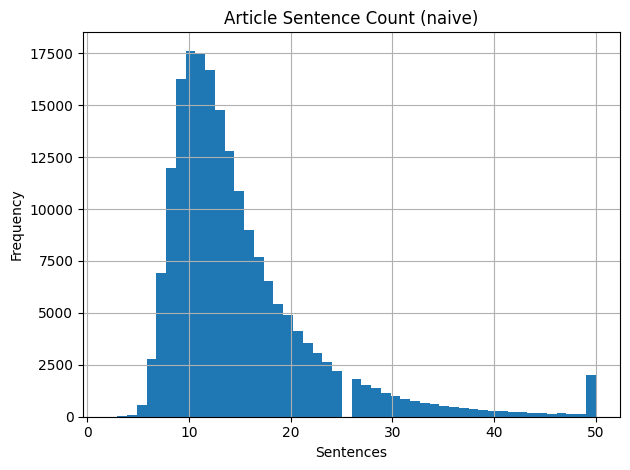

In [9]:
import re

def count_sentences(text):
    if pd.isna(text): return 0
    # naive split by punctuation . ! ? ; keeping it simple to avoid extra deps
    parts = re.split(r'[.!?;]+', str(text))
    # drop empties
    return len([p for p in parts if p.strip()!=''])

article_col_name = 'clean_article_text' # Use the actual column name

if article_col_name in df.columns:
    sent_counts = df[article_col_name].apply(count_sentences)
    print('Sentence count — mean/median/p90/max:',
          round(sent_counts.mean(),2), np.median(sent_counts), np.percentile(sent_counts,90), sent_counts.max())

    plt.figure()
    sent_counts.clip(upper=np.percentile(sent_counts, 99)).hist(bins=50)
    plt.title('Article Sentence Count (naive)')
    plt.xlabel('Sentences'); plt.ylabel('Frequency')
    plt.tight_layout(); plt.show()
else:
    print(f"Skip sentence count: required column '{article_col_name}' not found.")

<a id="step9"></a>

## Langkah 7 — Contoh Artikel Terpendek & Terpanjang

In [10]:
article_col_name = 'clean_article_text'
summary_col_name = 'clean_summary_text'

if article_col_name in df.columns and summary_col_name in df.columns:
    # Show a few examples by length
    art_len = df[article_col_name].apply(lambda x: len(str(x).split()))
    idx_short = art_len.nsmallest(3).index
    idx_long  = art_len.nlargest(3).index

    print("\n=== Short Articles ===")
    display(df.loc[idx_short, [article_col_name, summary_col_name]].head(3))

    print("\n=== Long Articles ===")
    display(df.loc[idx_long, [article_col_name, summary_col_name]].head(3))
else:
    print(f"Skip showing examples: required columns '{article_col_name}' or '{summary_col_name}' not found.")


=== Short Articles ===


,clean_article_text,clean_summary_text
79703,Setelah tak terkalahkan dalam empat laga awal ...,Setelah tak terkalahkan dalam empat laga awal ...
73264,Keinginan Alan Curbishley untuk memboyong stri...,Keinginan Alan Curbishley untuk memboyong stri...
55156,"Memasuki musim kemarau , Warga Gunungpati , Se...","Memasuki musim kemarau , warga Gunungpati , Se..."



=== Long Articles ===


,clean_article_text,clean_summary_text
111871,"Liputan6 . com , Jakarta : Tim 8 yang dibentuk...",Tim 8 yang dibentuk presiden merekomendasikan ...
23208,"Karikatur Nabi Muhammad SAW Liputan6 . com , D...","Awal 2006 , dunia dikejutkan dengan munculnya ..."
181120,"Liputan6 . com , Jakarta : Diam itu emas . Per...",Putri sulung Presiden Pertama RI Soekarno itu ...


## Langkah 8 — Frekuensi Kata Umum (Most Common Words)
Analisis kata yang paling sering muncul pada kolom `clean_article_text`.


20 Kata Paling Umum (setelah menghapus stopwords):
liputan         210180
com             172802
tak             145320
tersebut        129534
warga           125681
tim             113188
baru            101659
tahun           97709
rumah           96337
menjadi         94344
baca            91730
satu            85215
hingga          83633
polisi          83127
sejumlah        77397
lebih           75076
hari            73805
korban          72552
orang           72273
pemerintah      70277


,Word,Frequency
0,liputan,210180
1,com,172802
2,tak,145320
3,tersebut,129534
4,warga,125681
5,tim,113188
6,baru,101659
7,tahun,97709
8,rumah,96337
9,menjadi,94344


✅ Disimpan: /content/drive/MyDrive/Tugas/Liputan6/Outputs/top_words.csv


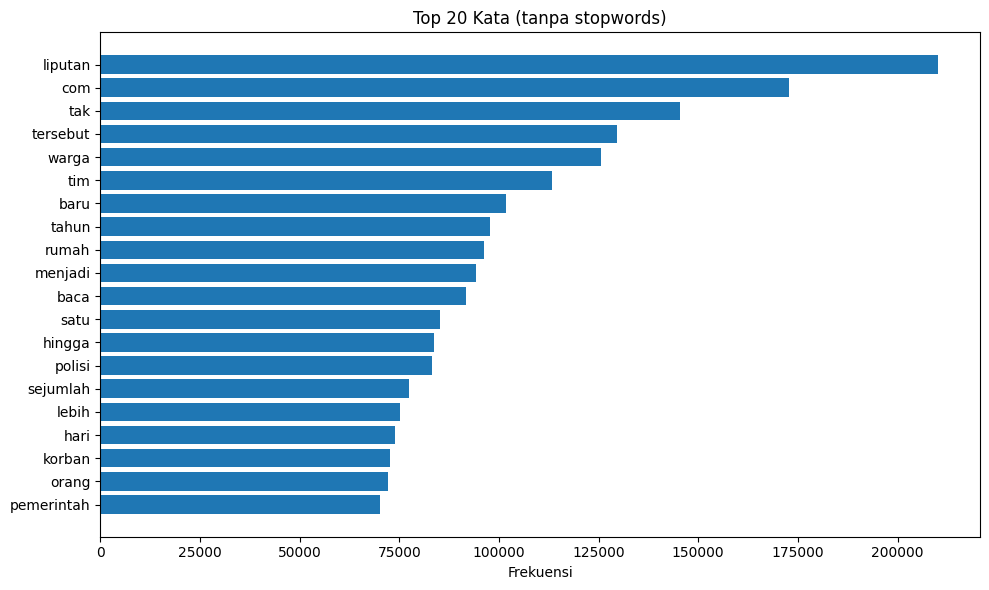

✅ Disimpan: /content/drive/MyDrive/Tugas/Liputan6/Outputs/top_words_bar.png


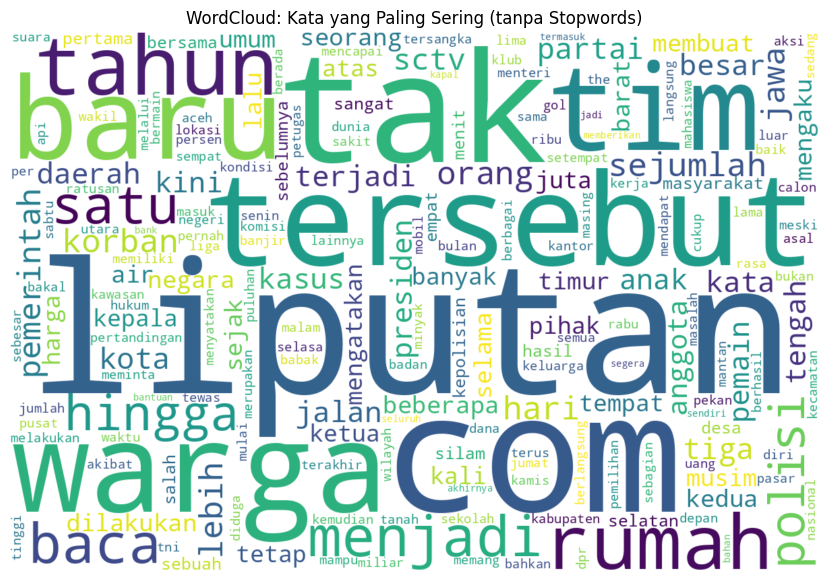

✅ Disimpan: /content/drive/MyDrive/Tugas/Liputan6/Outputs/wordcloud.png


In [11]:
# ============================================================
# Langkah 8 — Frekuensi Kata Umum (Most Common Words)
# (dengan penghapusan stopwords Bahasa Indonesia)
# + Simpan ke Google Drive: top_words.csv, top_words_bar.png, wordcloud.png
# ============================================================

# Pastikan Drive sudah di-mount dan OUTPUT_DIR ada
from pathlib import Path
try:
    OUTPUT_DIR  # cek sudah didefinisikan dari sel Config sebelumnya
except NameError:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    BASE_DIR = Path("/content/drive/MyDrive/Tugas/Liputan6")
    OUTPUT_DIR = BASE_DIR / "Outputs"

Path(OUTPUT_DIR).mkdir(parents=True, exist_ok=True)

import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# -------- 1) Gabungkan teks & tokenisasi --------
# Kolom: 'clean_article_text'
text_series = df['clean_article_text'].dropna().astype(str).str.lower()

# Hapus URL sederhana dan karakter non-huruf (biarkan spasi)
text_series = text_series.str.replace(r'https?://\S+|www\.\S+', ' ', regex=True)
text_series = text_series.str.replace(r'[^a-zA-Z\s]', ' ', regex=True)

# Tokenisasi sederhana per spasi
tokens = " ".join(text_series.tolist()).split()

# -------- 2) Stopwords Indonesia --------
factory = StopWordRemoverFactory()
stopwords = set(factory.get_stop_words())
# Tambahan stopwords umum di berita (opsional)
stopwords.update({
    'liputan6','kompas','detik','cnn','antaranews','jakarta','indonesia',
    'rt','via','itu','ini','akan','juga','sudah','karena','dengan','agar','yang'
})

# Filter stopwords dan kata pendek (<=2 huruf)
filtered_tokens = [t for t in tokens if t not in stopwords and len(t) > 2]

# -------- 3) Hitung frekuensi & tampilkan 20 teratas --------
counter = Counter(filtered_tokens)
common_words = counter.most_common(20)

print("20 Kata Paling Umum (setelah menghapus stopwords):")
for word, freq in common_words:
    print(f"{word:<15} {freq}")

common_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])
display(common_df)

# Simpan top words ke CSV
top_words_csv = Path(OUTPUT_DIR) / "top_words.csv"
common_df.to_csv(top_words_csv, index=False, encoding="utf-8")
print("✅ Disimpan:", top_words_csv)

# -------- 4) Simpan Bar Chart --------
plt.figure(figsize=(10,6))
# Urutkan agar barh naik ke atas
words_plot = [w for w, _ in common_words][::-1]
freqs_plot = [c for _, c in common_words][::-1]
plt.barh(words_plot, freqs_plot)
plt.title("Top 20 Kata (tanpa stopwords)")
plt.xlabel("Frekuensi")
plt.tight_layout()

top_words_bar_path = Path(OUTPUT_DIR) / "top_words_bar.png"
plt.savefig(top_words_bar_path, dpi=150)
plt.show()
print("✅ Disimpan:", top_words_bar_path)

# -------- 5) Simpan WordCloud --------
wordcloud = WordCloud(
    width=1200, height=800,
    background_color='white',
    max_words=200
).generate_from_frequencies(counter)

plt.figure(figsize=(12,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud: Kata yang Paling Sering (tanpa Stopwords)")

wordcloud_path = Path(OUTPUT_DIR) / "wordcloud.png"
plt.savefig(wordcloud_path, dpi=150, bbox_inches='tight')
plt.show()
print("✅ Disimpan:", wordcloud_path)


## Langkah 9 — Analisis Stopwords dalam Artikel

20 Stopword Paling Sering Muncul dalam Artikel:
di              880970
yang            855936
dan             637067
ini             404784
itu             325920
dengan          303716
dari            303293
untuk           265706
dalam           218837
ke              193063
akan            186618
tidak           183986
juga            178893
mereka          164640
pada            134099
karena          123189
saat            113463
para            108576
masih           102437
dua             99451


,Stopword,Frequency
0,di,880970
1,yang,855936
2,dan,637067
3,ini,404784
4,itu,325920
5,dengan,303716
6,dari,303293
7,untuk,265706
8,dalam,218837
9,ke,193063


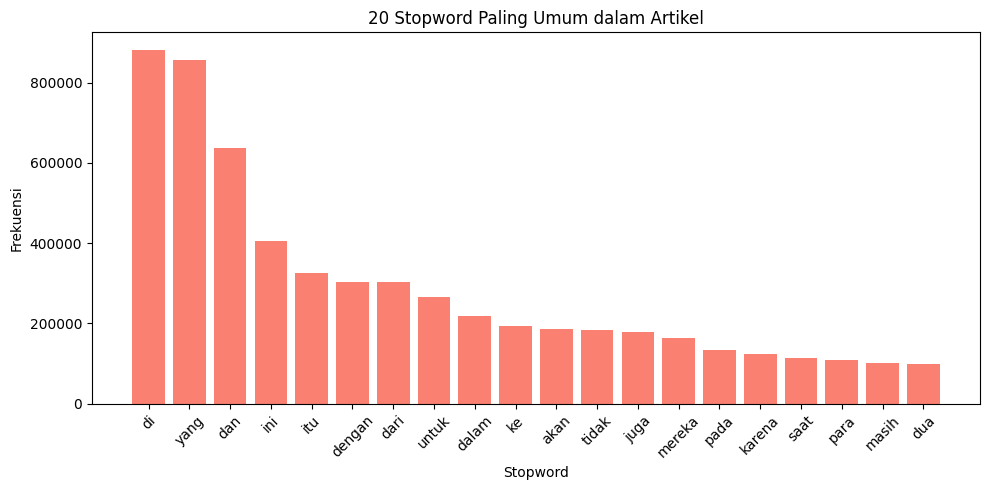

In [12]:
# ============================================================
# Langkah 9 — Analisis Stopwords dalam Artikel
# ============================================================

import matplotlib.pyplot as plt
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from collections import Counter
import pandas as pd
import re

# Gabungkan semua teks artikel
# Convert to string and handle potential NaNs
text_data = " ".join(df['clean_article_text'].dropna().astype(str)).lower()

# Hapus karakter non-alfabetik dan angka, tapi biarkan spasi
text_data = re.sub(r'[^a-zA-Z\s]', ' ', text_data)
tokens = text_data.split()

# Siapkan stopword list Bahasa Indonesia
factory = StopWordRemoverFactory()
stopwords = set(factory.get_stop_words())

# Ambil hanya token yang merupakan stopwords
stopword_tokens = [t for t in tokens if t in stopwords]

# Hitung frekuensi stopword
stopword_counter = Counter(stopword_tokens)
common_stopwords = stopword_counter.most_common(20)

# Tampilkan 20 stopword paling umum
print("20 Stopword Paling Sering Muncul dalam Artikel:")
for word, freq in common_stopwords:
    print(f"{word:<15} {freq}")

# Tampilkan dalam bentuk tabel
stop_df = pd.DataFrame(common_stopwords, columns=['Stopword', 'Frequency'])
display(stop_df)

# Visualisasi dengan bar chart
plt.figure(figsize=(10,5))
plt.bar(stop_df['Stopword'], stop_df['Frequency'], color='salmon')
plt.title("20 Stopword Paling Umum dalam Artikel")
plt.xlabel("Stopword")
plt.ylabel("Frekuensi")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Langkah 10 — Simpan Ringkasan EDA & Sampel ke Drive

In [13]:
# Fixing TypeError: unsupported operand type(s) for /: 'str' and 'str'
# and KeyError: 'article' / 'summary'
from pathlib import Path

# Convert OUTPUT_DIR to a Path object
output_path_obj = Path(OUTPUT_DIR)

summary_stats = {
    "rows": int(len(df)),
    "columns": list(df.columns),
    "article_col": 'clean_article_text', # Use the actual column name
    "summary_col": 'clean_summary_text'  # Use the actual column name
}
# Use Path object for file path
pd.Series(summary_stats, dtype='object').to_json(output_path_obj / "eda_summary_stats.json", force_ascii=False)

# Use the actual column names
sample_cols = [c for c in ['clean_article_text', 'clean_summary_text'] if c in df.columns]
if sample_cols:
    # Use Path object for file path
    df[sample_cols].dropna().head(100).to_csv(output_path_obj / "sample_100.csv", index=False)
else:
    print("Skipping sample saving: 'clean_article_text' or 'clean_summary_text' column not found.")


print("Saved:")
# Use Path objects for printing
print("-", output_path_obj / "eda_summary_stats.json")
if sample_cols:
    print("-", output_path_obj / "sample_100.csv")

Saved:
- /content/drive/MyDrive/Tugas/Liputan6/Outputs/eda_summary_stats.json
- /content/drive/MyDrive/Tugas/Liputan6/Outputs/sample_100.csv



## Langkah Akhir — Simpan Dataset Hasil EDA untuk Tahap Preprocessing
Menyimpan dataset hasil EDA ke folder `EDA_Outputs/` agar bisa langsung digunakan oleh notebook **Pre-processing (v5)**.


In [14]:

from pathlib import Path

# Pastikan folder output tersedia
EDA_OUTPUTS = Path("/content/drive/MyDrive/Tugas/Liputan6/EDA_Outputs")
EDA_OUTPUTS.mkdir(parents=True, exist_ok=True)

# Simpan dataset hasil EDA
EDA_PATH = EDA_OUTPUTS / "liputan6_dataset.csv"
df.to_csv(EDA_PATH, index=False)

print("✅ Dataset hasil EDA disimpan ke:", EDA_PATH)


✅ Dataset hasil EDA disimpan ke: /content/drive/MyDrive/Tugas/Liputan6/EDA_Outputs/liputan6_dataset.csv
